<a href="https://colab.research.google.com/github/diegocp01/diegocp01-github.io/blob/main/Capstone_Research_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime dataset in Los Angeles since 2020 - Research


#### By Diego Cabezas, FL
Outputs as of: 4/11/24

#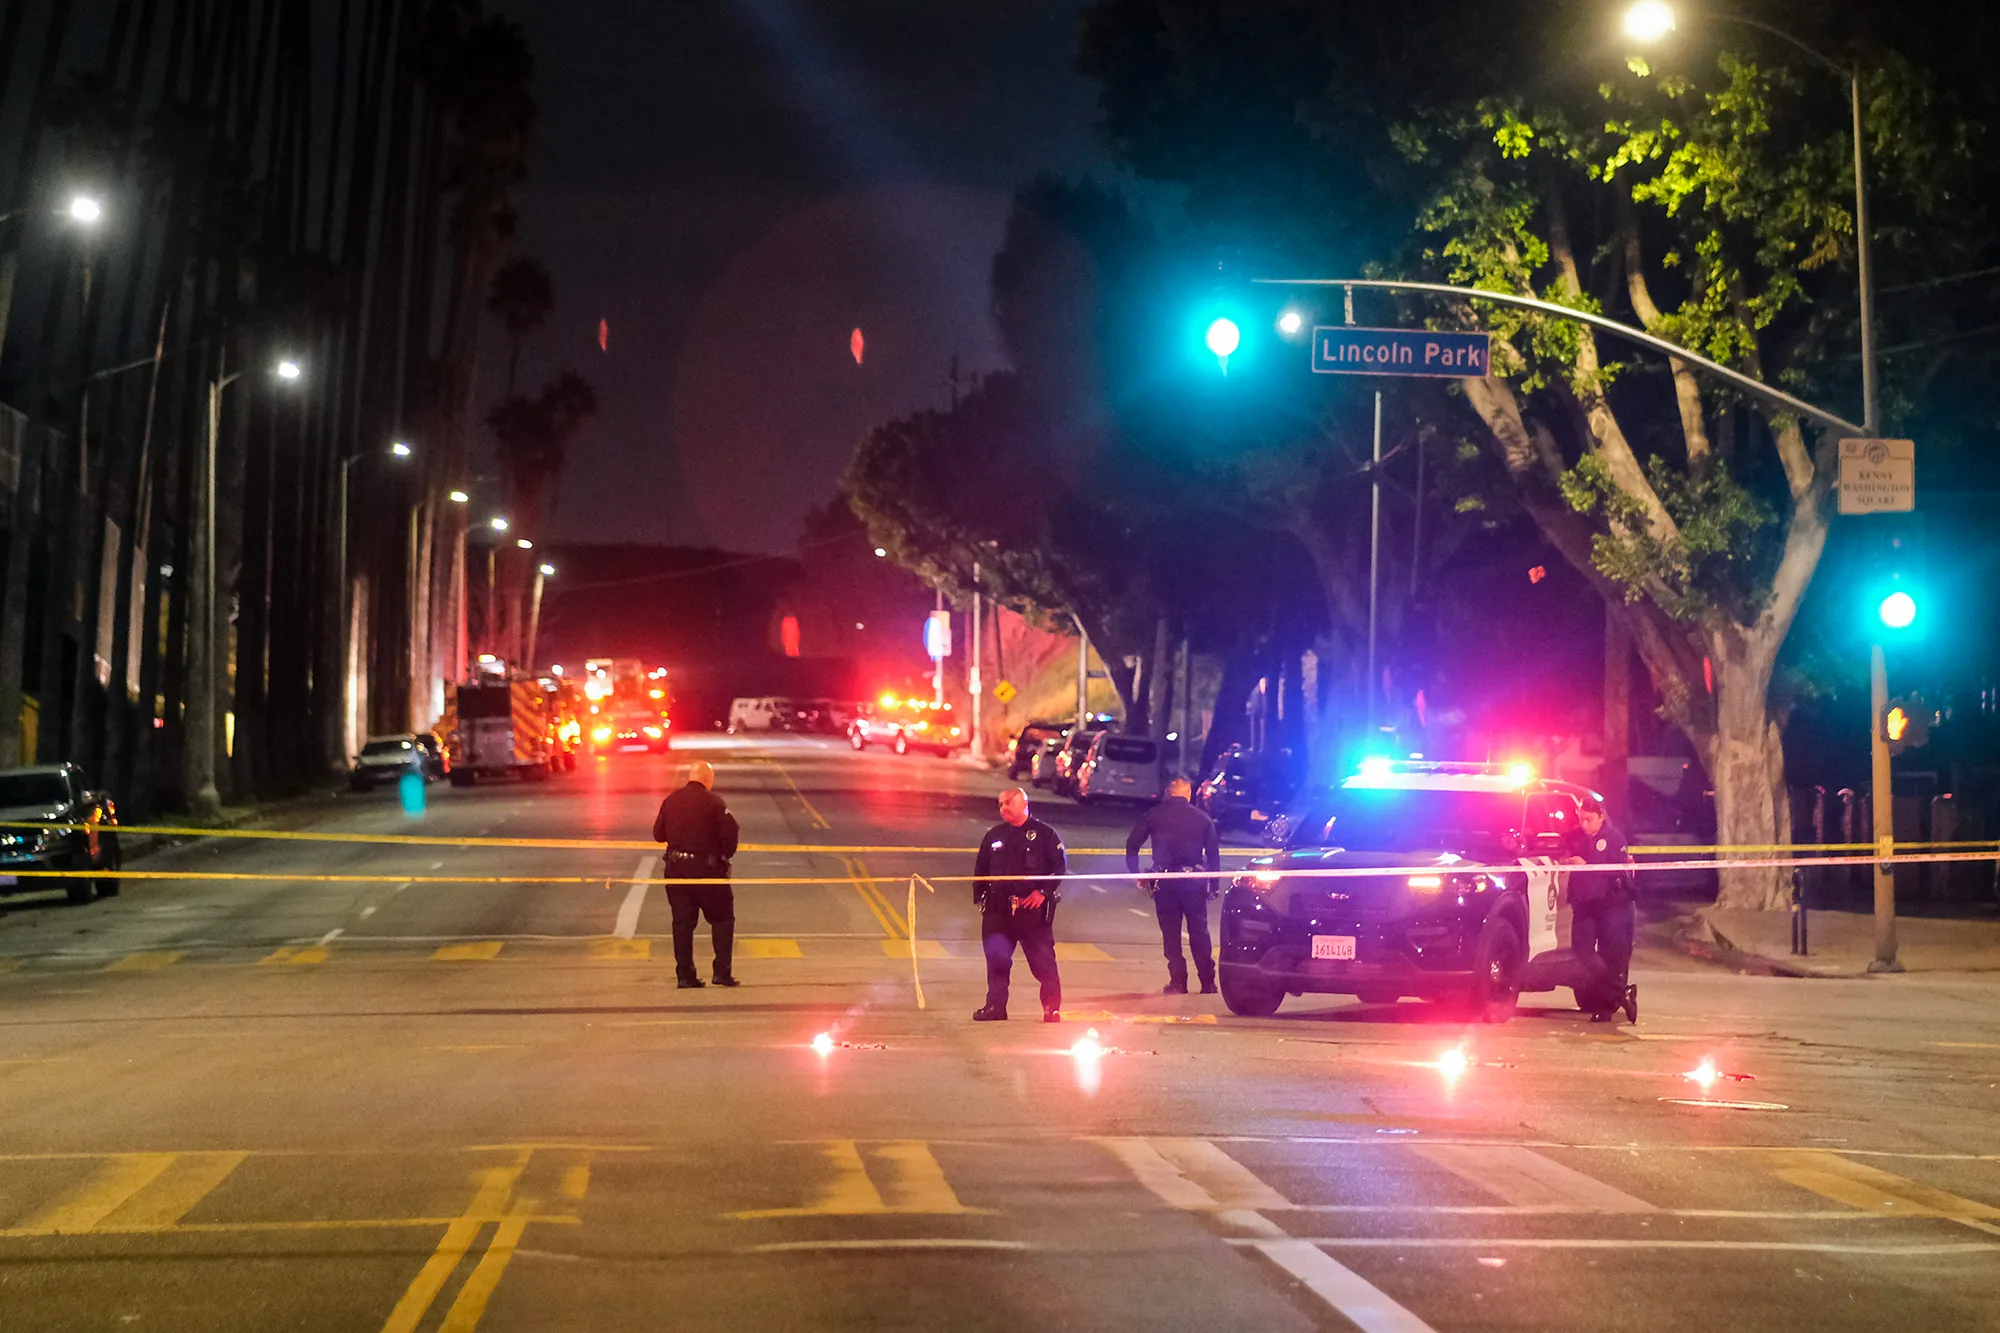



## Research Proposal:

### Analyzing Temporal Patterns of Crime in Los Angeles

**1. Overview**

Los Angeles, a city of stark contrasts and diverse neighborhoods, has a complex crime landscape that varies significantly across different times of the week. This proposal outlines a research project aimed at investigating the hypothesis that crime rates in Los Angeles significantly differ between weekdays and weekends. Understanding these temporal patterns is essential for optimizing law enforcement strategies and public safety initiatives.

**2. Objectives**

To determine if there are significant differences in the number of crimes committed on weekdays versus weekends in Los Angeles.
To provide actionable insights for law enforcement and community safety programs to enhance resource allocation and effectiveness.
**3. Hypotheses**

Null Hypothesis (H₀): There is no significant difference in the mean number of crimes committed on weekdays versus weekends in Los Angeles.
Alternative Hypothesis (Hₐ): There is a significant difference in the mean number of crimes committed on weekdays versus weekends in Los Angeles.

**4. Methodology**

The study will utilize a dataset from Data.gov containing crime records in Los Angeles from 2020 to the present, encompassing over 925,720 incidents. A comparative analysis will be conducted using the date of occurrence to classify crimes into weekday or weekend categories. Initial tests for data normality (Shapiro-Wilk test) will guide the choice of statistical tests, with a Mann-Whitney U test employed for non-parametric data to compare mean crime occurrences between the two groups.

**5. Expected Outcomes and Impact**

The analysis is expected to reveal whether crimes occur more frequently on weekdays or weekends, leading to a rejection or acceptance of the null hypothesis. Findings will guide law enforcement in tailoring their strategies to the times with higher crime rates, potentially enhancing public safety and resource efficiency. The results will be documented in a Jupyter Notebook, providing a clear narrative and statistical proof to support policy decisions.

**6. Audience**

The primary audience for this research includes law enforcement agencies, public safety organizations, and policymakers involved in crime prevention and community safety planning in Los Angeles.

**7. Conclusion**

This research aims to foster a safer environment for Los Angeles residents by providing law enforcement agencies with detailed insights into crime patterns. Through data-driven decision-making, this project expects to contribute significantly to the strategic planning and operational efficiency of crime prevention efforts in the city.


## 1. Introduction

Los Angeles, a city marked by its vast diversity and contrasting neighborhoods, presents a complex landscape for crime and safety. This study will examine crime data from Los Angeles from 2020 to the present, specifically investigating the hypothesis that crime rates significantly differ between weekdays and weekends. Understanding these patterns is crucial for law enforcement agencies and community safety initiatives, as it could influence the strategic allocation of resources and contribute to more targeted and effective crime prevention measures. By analyzing this data, we aim to provide actionable insights that could enhance the wellbeing and security of Los Angeles residents.

## 2. Hypothesis

**Null Hypothesis (H₀):** There is no significant difference in the mean number of crimes committed on weekdays versus weekends in Los Angeles.

**Alternative Hypothesis (Hₐ):** There is a significant difference in the mean number of crimes committed on weekdays versus weekends in Los Angeles.

## 3. Data

The data comes from [Data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present) and contains 925,720 observations and 28 variables.

In [5]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



crime_la = pd.read_csv("/content/Crime_Data_from_2020_to_Present.csv")

# Convert column headers to lower case for ease of coding

crime_la.columns = crime_la.columns.str.lower()

print(crime_la.shape)


crime_la.info()
crime_la.head()

(925720, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           925720 non-null  int64  
 1   date rptd       925720 non-null  object 
 2   date occ        925720 non-null  object 
 3   time occ        925720 non-null  int64  
 4   area            925720 non-null  int64  
 5   area name       925720 non-null  object 
 6   rpt dist no     925720 non-null  int64  
 7   part 1-2        925720 non-null  int64  
 8   crm cd          925720 non-null  int64  
 9   crm cd desc     925720 non-null  object 
 10  mocodes         796258 non-null  object 
 11  vict age        925720 non-null  int64  
 12  vict sex        802562 non-null  object 
 13  vict descent    802552 non-null  object 
 14  premis cd       925709 non-null  float64
 15  premis desc     925161 non-null  object 
 16  weapon used cd  319701 non-null  float64
 1

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,...,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


## 4. Methods

To test the hypothesis that crime rates in Los Angeles differ between weekdays and weekends, I will conduct a comparative analysis using the 'date occ' column from the dataset to classify each crime occurrence. A t-test will be performed to assess the difference in mean crime rates, assuming normal distribution which will be validated through exploratory data analysis including checks for skewness and kurtosis. Should the data distribution deviate from normality, a non-parametric test will be employed.

The targeted audience for this research includes law enforcement agencies and public safety organizations, who stand to benefit from understanding temporal crime patterns to improve resource allocation and preventive strategies. The findings will be presented in a Jupyter Notebook, offering a clear and concise narrative alongside the supporting statistical analysis.


In [6]:
# Convert 'date occ' to datetime and extract the day of the week
# 0 = Monday, 6 = Sunday
crime_la['day_of_week'] = pd.to_datetime(crime_la['date occ']).dt.dayofweek

# Classify as 'weekday' (0-4) and 'weekend' (5-6)
crime_la['day_type'] = np.where(crime_la['day_of_week'] < 5, 'weekday', 'weekend')

# Count the number of crimes for each day type
crime_counts = crime_la['day_type'].value_counts()

# Print the count of crimes
print(crime_counts)




<ipython-input-6-862f1364976e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_la['day_of_week'] = pd.to_datetime(crime_la['date occ']).dt.dayofweek


day_type
weekday    661100
weekend    264620
Name: count, dtype: int64


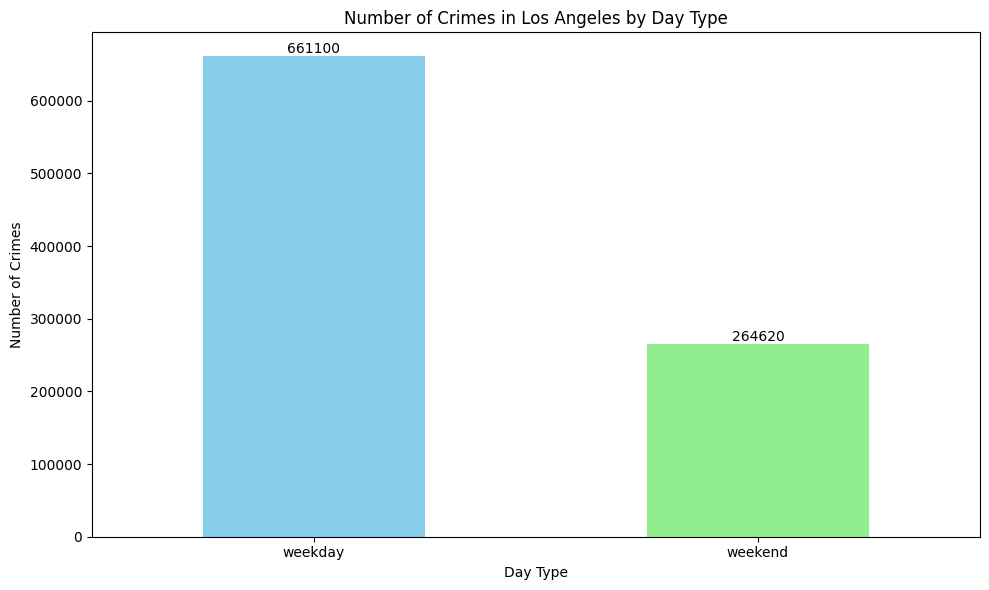

In [15]:
# Assuming 'crime_counts' contains the frequency of crimes for 'weekday' and 'weekend'
crime_counts = crime_la['day_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Add titles and labels
plt.title('Number of Crimes in Los Angeles by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)  # Rotate the x-axis labels to show them horizontally

# Show the values on top of each bar
for index, value in enumerate(crime_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [7]:

# We need to prepare the data for the two groups first
weekday_crimes = crime_la[crime_la['day_type'] == 'weekday']
weekend_crimes = crime_la[crime_la['day_type'] == 'weekend']



count    925720.000000
mean       1337.490209
std         652.693753
min           1.000000
25%         900.000000
50%        1416.000000
75%        1900.000000
max        2359.000000
Name: time occ, dtype: float64
Skewness: -0.43270070893971657, Kurtosis: -0.7892455768592805


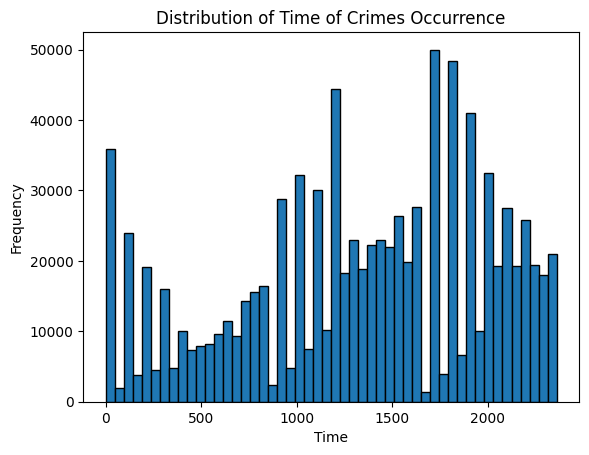

Shapiro-Wilk test statistic: 0.954361617565155, p-value: 2.592151493452377e-11
The sample does not appear to be normally distributed (reject H0).


In [10]:
# Using .describe() to get summary statistics
summary_stats = crime_la['time occ'].describe()
print(summary_stats)

# Calculate and print skewness and kurtosis
skewness = crime_la['time occ'].skew()
kurtosis = crime_la['time occ'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

# Visual inspection with a histogram
plt.hist(crime_la['time occ'], bins=50, edgecolor='k')
plt.title('Distribution of Time of Crimes Occurrence')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Statistical test for normality
from scipy.stats import shapiro

# Since Shapiro-Wilk test can be sensitive to large datasets, we'll sample 500 data points to perform the test
sampled_data = crime_la['time occ'].sample(n=500, random_state=1)
shapiro_stat, shapiro_p = shapiro(sampled_data)
print(f"Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {shapiro_p}")

# Interpret the results of the Shapiro-Wilk test
if shapiro_p > 0.05:
    print("The sample appears to be normally distributed (fail to reject H0).")
else:
    print("The sample does not appear to be normally distributed (reject H0).")


## 5. Results

Upon conducting the Shapiro-Wilk test, the p-value obtained is substantially low (p-value: 2.592151494352377e-11), which is below the commonly accepted alpha level of 0.05. This result leads us to reject the null hypothesis that the crime occurrences times is normally distributed.

Given the non-normality of the data, we will proceed with non-parametric statistical methods for our hypothesis testing. This is due to the fact that the t-test assumes normality of the data, which our sample violates according to the Shapiro-Wilk test results.

A suitable non-parametric test that we can use to compare the mean ranks of two independent samples is the Mann-Whitney U test. This test does not require the assumption of normal distribution and is used to assess whether there is a statistically significant difference between the distributions of two unrelated groups.






In [14]:
# Import necessary library for Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Separate data into weekdays and weekends
weekday_data = crime_la[crime_la['day_type'] == 'weekday']['time occ']
weekend_data = crime_la[crime_la['day_type'] == 'weekend']['time occ']

# Perform the Mann-Whitney U test
u_stat, u_p_value = mannwhitneyu(weekday_data, weekend_data, alternative='two-sided')

# Output the results
print(f"Mann-Whitney U test statistic: {u_stat}, p-value: {u_p_value}")

# Interpret the results of the Mann-Whitney U test
if u_p_value < 0.05:
    print("There is a statistically significant difference between the distributions of crime times on weekdays and weekends.")
else:
    print("There is no statistically significant difference between the distributions of crime times on weekdays and weekends.")


Mann-Whitney U test statistic: 88541255727.5, p-value: 2.9395147689864183e-20
There is a statistically significant difference between the distributions of crime times on weekdays and weekends.



The Mann-Whitney U test provided a method for evaluating our hypothesis about crime distribution on weekdays versus weekends in Los Angeles. Our null hypothesis (H₀) stated that there is no significant difference in the mean number of crimes committed on weekdays versus weekends.

The test resulted in a U statistic of 88541255727.5 and a p-value approximately 2.94e-20. This p-value is substantially below the conventional alpha level of 0.05, which leads us to reject the null hypothesis (H₀). Consequently, we accept the alternative hypothesis (Hₐ) that **there is a significant difference in the mean number of crimes committed on weekdays versus weekends in Los Angeles.**

<section>
  <h2>6. Discussion and Recommendation</h2>
  <p>Rejecting the null hypothesis has meaningful implications for crime prevention and resource allocation in Los Angeles. The statistically significant difference in crime distributions suggests that more crimes are committed on either weekdays or weekends, which could be influenced by factors such as population movement, social activities, and economic factors that vary between these periods.</p>
  
  <p>Law enforcement agencies might utilize this information to optimize patrol schedules and community programs, potentially increasing their presence during periods when crimes are more likely to occur. The specific allocation and strategies should be based on a more detailed analysis that considers not only the distribution of crimes over time but also the severity and type of crimes.</p>
  
  <p>Further studies could explore the types of crimes most prevalent on weekdays versus weekends, geographical crime hotspots, and the effectiveness of different policing strategies for these periods. Additionally, a similar analysis could be extended to public holidays and significant local events to understand their impact on crime rates.</p>
  
  <p>This study underlines the importance of evidence-based policy-making in public safety and encourages ongoing analysis to adapt to changing crime patterns.</p>
</section>


# Extra interesting facts

In [17]:
crime_counts = crime_la['crm cd desc'].value_counts()

# Display the most common crime descriptions
print(crime_counts)

crm cd desc
VEHICLE - STOLEN                                      99451
BATTERY - SIMPLE ASSAULT                              73376
BURGLARY FROM VEHICLE                                 57098
THEFT OF IDENTITY                                     57079
BURGLARY                                              56736
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
DISHONEST EMPLOYEE ATTEMPTED THEFT                        2
TRAIN WRECKING                                            1
Name: count, Length: 139, dtype: int64


In [18]:
# Get the counts of unique values in 'area name' column
area_counts = crime_la['area name'].value_counts()

# Display the counts of crimes by area
print(area_counts)

area name
Central        62852
77th Street    57878
Pacific        53984
Southwest      52140
Hollywood      48813
Olympic        46876
Southeast      46720
N Hollywood    46558
Newton         45921
Wilshire       44529
Rampart        43424
West LA        42497
Northeast      39682
Van Nuys       39166
West Valley    38944
Harbor         38156
Devonshire     37919
Topanga        37877
Mission        36818
Hollenbeck     34346
Foothill       30620
Name: count, dtype: int64
